In [ ]:
#imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from sklearn.model_selection import train_test_split as tts
import os

In [ ]:
#data directory
Data_Dir = r"./Data/faces/"
print(os.listdir(Data_Dir))

['man', 'woman']


In [ ]:
#jupyter notebook parameters
Batch_size = 64
image_size = 128
in_channels = 1
Model_Name = "Gender_AI.keras"
epochs = 5

In [ ]:
# Data Generator with Augmentation
data_generator = idg(rescale=1./255,validation_split=0.25,rotation_range=20,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_data = data_generator.flow_from_directory(Data_Dir,target_size=(image_size,image_size),color_mode='grayscale',batch_size=Batch_size,class_mode="binary",subset="training",shuffle=True)
valid_data = data_generator.flow_from_directory(Data_Dir,target_size=(image_size,image_size),color_mode='grayscale',batch_size=Batch_size,class_mode="binary",subset="validation")


Found 14234 images belonging to 2 classes.
Found 4744 images belonging to 2 classes.


In [ ]:
#imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
#model architecture
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal',input_shape=(image_size, image_size, in_channels)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#optimizer and compile
optimizer = Adam(learning_rate=1e-3)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint(f"Model//{Model_Name}", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-5)


callback = [checkpoint, earlystop, reduce_lr]

In [ ]:
# Load pretrained model if exists
try:
    model.load_weights(f"Model\\{Model_Name}")
except Exception as e:
    print(f"{e},\n you dont have pretrained model : -> {Model_Name}\nStaring to train new model from scratch")

In [ ]:
#model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 8,678,369 (33.11 MB)

 Trainable params: 8,676,961 (33.10 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [36]:
#model training
model_history = model.fit(train_data,validation_data = valid_data, epochs=epochs,callbacks=callback)

Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8858 - loss: 0.2698
Epoch 1: val_accuracy improved from None to 0.86172, saving model to Model//Gender_AI.keras
223/223 ━━━━━━━━━━━━━━━━━━━━ 463s 2s/step - accuracy: 0.8917 - loss: 0.2605 - val_accuracy: 0.8617 - val_loss: 0.3679 - learning_rate: 0.0010
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9085 - loss: 0.2223
Epoch 2: val_accuracy did not improve from 0.86172
223/223 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.9007 - loss: 0.2405 - val_accuracy: 0.7426 - val_loss: 0.6649 - learning_rate: 0.0010
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9128 - loss: 0.2164
Epoch 3: val_accuracy did not improve from 0.86172
223/223 ━━━━━━━━━━━━━━━━━━━━ 412s 2s/step - accuracy: 0.9160 - loss: 0.2105 - val_accuracy: 0.7818 - val_loss: 0.5812 - learning_rate: 0.0010
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9246 - loss: 0.1887
Epoch 4: val_accuracy did not improve from 0

Found 18978 images belonging to 2 classes.


c:\Users\Rohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


594/594 ━━━━━━━━━━━━━━━━━━━━ 88s 148ms/step


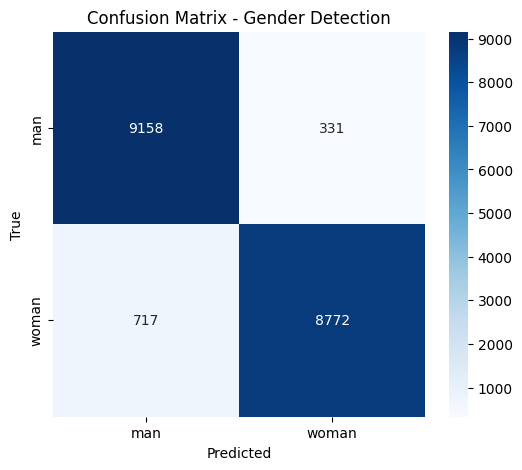

Classification Report:

              precision    recall  f1-score   support

         man       0.93      0.97      0.95      9489
       woman       0.96      0.92      0.94      9489

    accuracy                           0.94     18978
   macro avg       0.95      0.94      0.94     18978
weighted avg       0.95      0.94      0.94     18978



In [37]:
# Evaluation and Visualization
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

model = load_model(r"Model\\Gender_AI.keras")

valid_data = idg(rescale=1./255)

valid_data = valid_data.flow_from_directory(
    Data_Dir,    
    target_size=(128, 128),
    batch_size=32,
    color_mode="grayscale",
    class_mode="binary",
    shuffle=False
)
y_prob = model.predict(valid_data, verbose=1)
y_pred = (y_prob >= 0.5).astype(int).reshape(-1)
y_true = valid_data.classes

cm = confusion_matrix(y_true, y_pred)
labels = list(valid_data.class_indices.keys())

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Gender Detection")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))
